In [2]:
from sklearn.datasets import load_iris

#### Problem 1.1

In [3]:
iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
import pandas as pd
ir = pd.DataFrame(iris['data'])

In [6]:
ir['Species'] = pd.DataFrame(iris['target'])

In [7]:
ir['Species'] = ir['Species'].replace({0: "setosa", 1: "versicolor", 2: 'virginica'})
ir.head()

,0,1,2,3,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
ir_features = ir.drop(columns = 'Species')
ir_label = ir['Species']

In [10]:
ir_features['00'] = pd.Series([1]*150)

In [11]:
for i in range(len(ir_label)):
    if ir_label[i] == 'setosa':
        ir_label[i] = 1
    else:
        ir_label[i] = 0
ir_label

<ipython-input-11-bd9375632bfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ir_label[i] = 1
<ipython-input-11-bd9375632bfa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ir_label[i] = 0


0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Species, Length: 150, dtype: object

In [12]:
ir_features

,0,1,2,3,00
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    ir_features, ir_label, 
    test_size = 0.2, random_state = 10
)

In [14]:
def hypothesis(X, w):
    z = np.dot(w, X.T)
    return 1/(1+np.exp(-(z))) 

In [15]:
ir_features

,0,1,2,3,00
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    ir_features, ir_label, 
    test_size = 0.2, random_state = 10
)

In [17]:
x_train

,0,1,2,3,00
58,6.6,2.9,4.6,1.3,1
97,6.2,2.9,4.3,1.3,1
129,7.2,3.0,5.8,1.6,1
114,5.8,2.8,5.1,2.4,1
146,6.3,2.5,5.0,1.9,1
...,...,...,...,...,...
113,5.7,2.5,5.0,2.0,1
64,5.6,2.9,3.6,1.3,1
15,5.7,4.4,1.5,0.4,1
125,7.2,3.2,6.0,1.8,1


In [18]:
def error(X, y, w):
    n = len(X)
    yp = hypothesis(X, w)
    return np.sum((yp-y)**2)/n

In [19]:
def grad_des(X, y, w, alpha, epoch):
    n = len(X)
    j = [error(X, y, w)]
    w1 = []
    for i in range(epoch):
        yp = hypothesis(X, w)
        for i in range(4):
            w[i] -= (alpha/n) * np.sum(-2*X[i]*(y-yp))
        w[4] -= (alpha/n) *np.sum(-2*(y-yp))
        w1.append(list(w))
        j.append(error(X, y, w))
        #w1.append(w)
    return j, w1       

In [20]:
import numpy as np
w = np.random.rand(5)
w

array([0.49673345, 0.89293745, 0.69201877, 0.09407238, 0.71385168])

In [21]:
yp = hypothesis(x_train, w)

In [25]:
w = np.random.rand(5)

In [26]:
j, w1 = grad_des(x_train, y_train, w, 0.01, 500)

In [27]:
w1

[[0.29229189142245815,
  0.2997671830662293,
  0.39721407737439424,
  0.6057431141699565,
  0.5895119674503333],
 [0.20928229352397498,
  0.26185311739317674,
  0.33172093488979243,
  0.58312508611601,
  0.576359428310093],
 [0.1272183308380293,
  0.22451766224253514,
  0.2666411072806236,
  0.5606125318677211,
  0.5633867548399899],
 [0.04707464027521094,
  0.1883242818266253,
  0.20247399549868844,
  0.5383470652383472,
  0.550771850827832],
 [-0.029256677287416405,
  0.15431952060331425,
  0.14029460471936522,
  0.5166509472346908,
  0.5388496540449834],
 [-0.0984815839197005,
  0.12423111192519277,
  0.08218679029163325,
  0.49618109934326177,
  0.5281822135402305],
 [-0.15618200846616437,
  0.1002426873140903,
  0.03125573855798854,
  0.47796137357394236,
  0.5194922369586846],
 [-0.19924637699829958,
  0.08376489870275941,
  -0.009997776041619777,
  0.46286329067349025,
  0.5132577405229198],
 [-0.2285740434076469,
  0.07421376128449586,
  -0.04185017191704924,
  0.45085299946593

In [28]:
er_train = []
for i in range(len(w1)):
    er_train.append(error(x_train, y_train, w1[i]))
er_train

[0.6635185047717752,
 0.6589429922748065,
 0.6479326986850242,
 0.6226231979767408,
 0.5701961657159405,
 0.4825709781104715,
 0.3801446006570238,
 0.30130582286727775,
 0.2562489900450933,
 0.2328268880113136,
 0.22007700250816695,
 0.21232011047188323,
 0.20694001038352156,
 0.20272973642495704,
 0.199114599592327,
 0.19581178899635848,
 0.1926786547145425,
 0.1896423720358545,
 0.1866659402673766,
 0.18373111375640508,
 0.18082955952297386,
 0.17795816371318607,
 0.1751164979503752,
 0.17230543974800153,
 0.16952642209510113,
 0.16678103094717656,
 0.16407079659709775,
 0.16139709313773454,
 0.1587610976501748,
 0.15616378165629446,
 0.15360591922418332,
 0.1510881029041846,
 0.14861076258887396,
 0.14617418465282658,
 0.14377853003040877,
 0.14142385063093024,
 0.13911010390270523,
 0.13683716557740602,
 0.13460484073434598,
 0.1324128733689228,
 0.1302609546588068,
 0.12814873011233072,
 0.12607580576571198,
 0.12404175357477042,
 0.12204611612577008,
 0.12008841077046055,
 0.1181

In [29]:
er_test = []
for i in range(len(w1)):
    er_test.append(error(x_test, y_test, w1[i]))
er_test

[0.6629769453134524,
 0.6577130384363825,
 0.6452784763326497,
 0.6174060109955471,
 0.561574714924326,
 0.47190060924135435,
 0.37084575551896465,
 0.2949533180929765,
 0.25215248195057083,
 0.23004801209145917,
 0.2180435831010718,
 0.2107316363256683,
 0.2056392392933883,
 0.20163136543599902,
 0.198170242697104,
 0.19499275423588722,
 0.1919671733438456,
 0.18902693976180035,
 0.18613874082640516,
 0.1832865429701914,
 0.18046335492802731,
 0.17766687971155715,
 0.174897184348992,
 0.17215544316384762,
 0.16944326312912675,
 0.16676232880925637,
 0.16411422375563603,
 0.16150034906543836,
 0.158921894711158,
 0.1563798386610788,
 0.15387495975563523,
 0.1514078565326934,
 0.14897896775558836,
 0.1465885924324762,
 0.1442369082697795,
 0.14192398814637522,
 0.13964981454310618,
 0.13741429203941596,
 0.13521725806885213,
 0.1330584921509962,
 0.13093772381432153,
 0.12885463940720154,
 0.12680888797115877,
 0.12480008632606973,
 0.1228278234938521,
 0.12089166456628195,
 0.118991154

Text(0.5, 1.0, 'MSE of training set as a function of iteration')

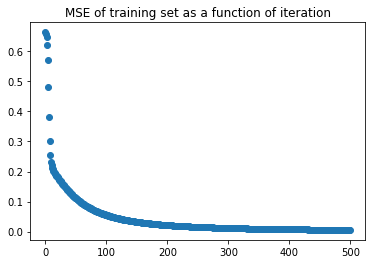

In [46]:
import matplotlib.pyplot as plt
plt.scatter(range(500), er_train)
plt.title("MSE of training set as a function of iteration")

Text(0.5, 1.0, 'MSE of test set as a function of iteration')

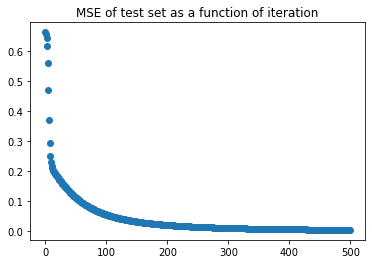

In [47]:
import matplotlib.pyplot as plt
plt.scatter(range(500), er_test)
plt.title("MSE of test set as a function of iteration")

In [33]:
ir.head()

,0,1,2,3,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [34]:
w1

[[0.29229189142245815,
  0.2997671830662293,
  0.39721407737439424,
  0.6057431141699565,
  0.5895119674503333],
 [0.20928229352397498,
  0.26185311739317674,
  0.33172093488979243,
  0.58312508611601,
  0.576359428310093],
 [0.1272183308380293,
  0.22451766224253514,
  0.2666411072806236,
  0.5606125318677211,
  0.5633867548399899],
 [0.04707464027521094,
  0.1883242818266253,
  0.20247399549868844,
  0.5383470652383472,
  0.550771850827832],
 [-0.029256677287416405,
  0.15431952060331425,
  0.14029460471936522,
  0.5166509472346908,
  0.5388496540449834],
 [-0.0984815839197005,
  0.12423111192519277,
  0.08218679029163325,
  0.49618109934326177,
  0.5281822135402305],
 [-0.15618200846616437,
  0.1002426873140903,
  0.03125573855798854,
  0.47796137357394236,
  0.5194922369586846],
 [-0.19924637699829958,
  0.08376489870275941,
  -0.009997776041619777,
  0.46286329067349025,
  0.5132577405229198],
 [-0.2285740434076469,
  0.07421376128449586,
  -0.04185017191704924,
  0.45085299946593

In [40]:
pd.DataFrame(w1)

,0,1,2,3,4
0,0.292292,0.299767,0.397214,0.605743,0.589512
1,0.209282,0.261853,0.331721,0.583125,0.576359
2,0.127218,0.224518,0.266641,0.560613,0.563387
3,0.047075,0.188324,0.202474,0.538347,0.550772
4,-0.029257,0.154320,0.140295,0.516651,0.538850
...,...,...,...,...,...
495,0.083190,1.020216,-1.531082,-0.245623,0.691899
496,0.083432,1.020960,-1.532217,-0.246147,0.692039
497,0.083673,1.021704,-1.533350,-0.246670,0.692179
498,0.083914,1.022445,-1.534481,-0.247192,0.692318


Text(0.5, 1.0, 'MSE as a function of Sepal Width weights')

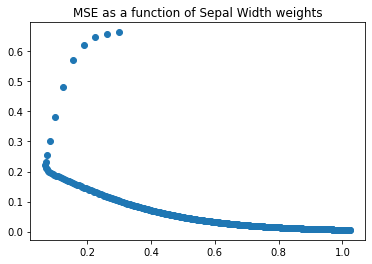

In [48]:
plt.scatter(pd.DataFrame(w1)[1], er_train)
plt.title("MSE for training set as a function of Sepal Width weights")

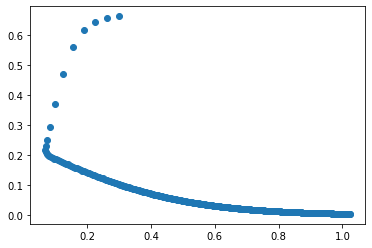

In [43]:
plt.scatter(pd.DataFrame(w1)[1], er_test)
plt.title("MSE for test set as a function of Sepal Width weights")

Text(0.5, 1.0, 'MSE for training set as a function of petal length weights')

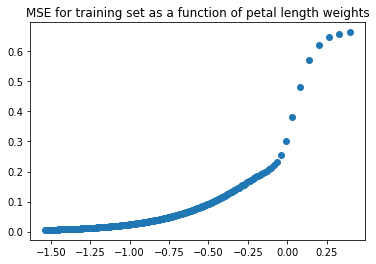

In [49]:
plt.scatter(pd.DataFrame(w1)[2], er_train)
plt.title("MSE for training set as a function of petal length weights")

Text(0.5, 1.0, 'MSE for test set as a function of petal length weights')

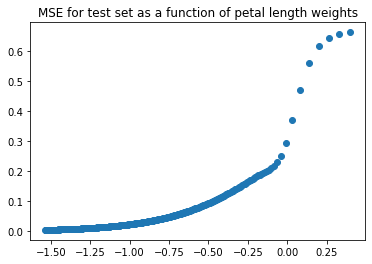

In [50]:
plt.scatter(pd.DataFrame(w1)[2], er_test)
plt.title("MSE for test set as a function of petal length weights")